In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=16)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
from sklearn import metrics

In [16]:
df = pd.read_csv("./data/clean_one_hot_data.csv")
df.drop(df.columns[0], axis=1,inplace=True)

y = df['attrition']
X = df.drop(columns=['attrition'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
logreg = LogisticRegression(max_iter=4000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

In [17]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix)
# from documentation: tn, fp, fn, tp

[305  15  29  19]


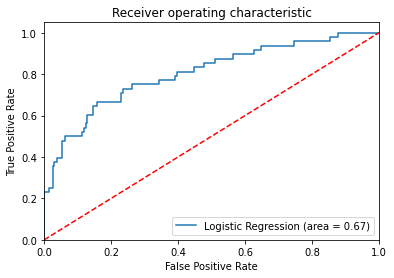

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [35]:
assumed_top_10 = ['age', 'job_satisfaction', 'monthly_income', 'over_time', 'work_life_balance', 'years_since_last_promotion', 
                  'marital_status_single', 'department_sales', 'num_companies_worked', 'job_involvement']

In [36]:
len(assumed_top_10)

10

In [46]:
df = pd.read_csv("./data/clean_one_hot_data.csv")
df.drop(df.columns[0], axis=1,inplace=True)

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit_transform(df)

array([[ 0.4463504 ,  2.28090588, -0.16239918, ..., -0.31409347,
        -0.91892141,  1.45864991],
       [ 1.32236521, -0.4384223 ,  1.71733935, ..., -0.31409347,
         1.08823234, -0.68556546],
       [ 0.008343  ,  2.28090588, -0.16239918, ..., -0.31409347,
        -0.91892141,  1.45864991],
       ...,
       [-1.08667552, -0.4384223 , -0.16239918, ..., -0.31409347,
         1.08823234, -0.68556546],
       [ 1.32236521, -0.4384223 ,  1.71733935, ..., -0.31409347,
         1.08823234, -0.68556546],
       [-0.32016256, -0.4384223 , -0.16239918, ..., -0.31409347,
         1.08823234, -0.68556546]])

In [47]:
y = df['attrition']
X = df[assumed_top_10].values

In [48]:
X.shape

(1470, 10)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
logreg = LogisticRegression(max_iter=4000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

In [50]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix)
# from documentation: tn, fp, fn, tp

[320   0  48   0]


In [52]:
lasso_coeffs = ['daily_rate', 'monthly_income', 'job_satisfaction', 'business_travel', 'years_at_company', 'age']

In [63]:
df = pd.read_csv("./data/clean_one_hot_data.csv")
df.drop(df.columns[0], axis=1,inplace=True)

y = df['attrition'].values
X = df[lasso_coeffs].values

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit_transform(df)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
logreg = LogisticRegression(max_iter=150)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=150)

In [64]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


In [66]:
confusion_matrix = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix)
# from documentation: tn, fp, fn, tp

TypeError: 'numpy.ndarray' object is not callable